# Chatbot Movie Recommendation System 

## Introduction: 
Imagine you want to watch a movie, but you’ve already watched all the ones on your bucket list. The recommendation system will match your ideal movie description with a database of movie descriptions and suggest the top five movies that match your description.
### Purpose: 
•The main goal is to make the machine smartly recommends movies to the users in their own language. 
•Develop a model to process and understand text in multiple languages.  
•To entertain users.
### Major Problem:
•Solved one of the NLP challenges which is the machine’s grasping of the human text (especialy when it is Arabic)
•In Arabia and India there are few people who don’t know English, so for those people it will be difficult to use the chatbots for any kind of help. Building a chatbot in their known language will be helpful to all of them. 
### Types of Recommendation System:
**•Contextual Type:** make use of varied inputs to make sure that recommendations are smarter. They include keywords and other forms of input to filter and rank recommendations. 
**•Collaborative Filtering-based type:** this type of recommendation system takes data from several different users and learns how to predict what someone might like based on search and choice similarity like looking at people who have the same taste. 

#  Datasets:

#### 1- Kaggle: 
###### A. Arabic Movies Data: Contains information on more than 1200 movies such as release date, genres, and cast …etc 
###### B. English Movies Data:. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.
###### C. Telugu Movies (indians) contains information on more than 3000 movies such as release date, genres, and cast …etc 
#### 2- Web Scraping: 
###### A. Movies Data pulled from Wikipedia Platform: Contains about 400 movies and their information. 

## Strargy: 
The steps in this procedure are as follows:
__Data Set loading
__Data Pre-processing (remove Stop words, Stemming, etc..)
__Feature Selection
__Building the Recommendation system
Testing the Model Results
Chatbot Construction
Recommending Movies 

##### Some Plots I did not put here: 









Visulize Practicum.jpeg

In [1]:
from flask import Flask, jsonify, render_template, request
from flask_cors import CORS, cross_origin
import pandas as pd
from ast import literal_eval
import numpy as np
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import boto3
from botocore.config import Config
import seaborn as sns

ModuleNotFoundError: No module named 'flask_cors'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#Importing the relevant datasets from the mounted Google Drive (change the code below if the data is hosted elsewhere)
metadata = pd.read_csv("/Users/newuser/Desktop/KaggleMovieData/movies_metadata.csv")
credits = pd.read_csv("/Users/newuser/Desktop/KaggleMovieData/credits.csv")

In [ ]:
list(metadata)

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [ ]:
row = []
for i,j in enumerate(metadata['id']):
    try:
        c = int(j)
    except:
        row.append(i)

In [ ]:
metadata.drop(row,inplace=True)
metadata.reset_index(drop=True,inplace=True)

In [ ]:
credits['id'] = credits['id'].astype('int')
metadata['id'] = metadata['id'].astype('int')

In [ ]:
metadata = metadata.merge(credits, on='id')

In [ ]:
#Print the important features of metadata
metadata[['title', 'cast', 'crew', 'genres']].head()

title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...   

                                              genres  
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  
4                     [{'id': 35, 'name': 'Comedy'}]

In [ ]:
metadata

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45533  False                                                NaN         0   
45534  False                                                NaN         0   
45535  False                                                NaN         0   
45536  False                                                NaN         0   
45537  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45533  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45534                      [{'id': 18, 'name': 'Drama'}]   
45535  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45536                                                 []   
45537                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45533  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45534                                   NaN  111109  tt2028550   
45535                                   NaN   67758  tt0303758   
45536                                   NaN  227506  tt0008536   
45537                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45533                fa                      رگ خواب   
45534                tl          Siglo ng Pagluluwal   
45535                en                     Betrayal   
45536                en          Satana likuyushchiy   
45537                en                     Queerama   

                                                overview  ... runtime  \
0      Led by Woody, Andy's toys live happily in his ...  ...    81.0   
1      When siblings Judy and Peter discover an encha...  ...   104.0   
2      A family wedding reignites the ancient feud be...  ...   101.0   
3      Cheated on, mistreated and stepped on, the wom...  ...   127.0   
4      Just when George Banks has recovered from his ...  ...   106.0   
...                                                  ...  ...     ...   
45533        Rising and falling between a man and woman.  ...    90.0   
45534  An artist struggles to finish his work while a...  ...   360.0   
45535  When one of her hits goes wrong, a professiona...  ...    90.0   
45536  In a small town live two brothers, one a minis...  ...    87.0   
45537  50 years after decriminalisation of homosexual...  ...    75.0   

                  

In [ ]:
#raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.
#Parse the stringified features into their corresponding python objects

from ast import literal_eval

features = ['cast', 'crew', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(literal_eval)

In [ ]:
def f(x):
    d = []
    for i in x:
        d.append(i['name'])
    return d

In [ ]:
metadata['genres'] = metadata['genres'].apply(lambda x:f(x))

In [ ]:
metadata['cast'] = metadata['cast'].apply(lambda x:f(x))

In [ ]:
#This function makes use of the property of the cosine similarity funciton that
#the order and types of inputs don't matter, what matters is the similarity
#between different soups of words
def create_soup(x):
    return ' '.join(x['cast']) + ' ' + ' '.join(x['genres'])

metadata['soup'] = metadata.apply(create_soup, axis=1)

In [ ]:
#Getting the user's input for genre, actors and directors of their liking.
def get_genres():
    genres = input("What Movie Genre are you interested in (ماهو نوع الفيلم الذي تريد مشاهدته؟)? [Type 'skip' to skip this question] ")
    genres = " ".join(["".join(n.split()) for n in genres.lower().split(',')])
    return genres

def get_actors():
    actors = input("Who are some actors within the genre that you love (اهو نوع الفيلم؟)? [Type 'skip' to skip this question] ")
    actors = " ".join(["".join(n.split()) for n in actors.lower().split(',')])
    return actors

def get_language():
    original_language = input("What is the spoken language (type 'en' for English and 'ar' for Arabic [نملك افلام في لغتين] ")
    original_language = " ".join(["".join(n.split()) for n in original_language.lower().split(',')])
    return original_language
#def get_directors():
#directors = input("Who are some directors within the genre that you love (if multiple, please separate them with a comma)? [Type 'skip' to skip this question] ")
 # directors = " ".join(["".join(n.split()) for n in directors.lower().split(',')])
# return directors

def get_keywords():
    keywords = input("What are some of the keywords that describe the movie you want to watch, like elements of the plot, whether or not it is about friendship, etc? (if multiple, please separate them with a comma)? [Type 'skip' to skip this question] ")
    keywords = " ".join(["".join(n.split()) for n in keywords.lower().split(',')])
    return keywords

def get_searchTerms():
    searchTerms = [] 
    genres = get_genres()
    if genres and genres != 'skip':
        searchTerms.append(genres.title())
    else:
        searchTerms.append(None)

    actors = get_actors()
    if actors and actors != 'skip':
        searchTerms.append(actors.title())
    else:
        searchTerms.append(None)
    
    original_language = get_language()
    if original_language in ('en','ar'):
        searchTerms.append(original_language)
    else:
        searchTerms.append('en')
    
    return searchTerms

In [ ]:
metadata = metadata.iloc[0:10000,:] # only using 10k movies

In [ ]:
metadata = metadata[['title','genres','original_language','cast','soup','overview','release_date']]

In [ ]:
metadata.dropna(inplace=True)

In [ ]:
metadata['Year'] = metadata['release_date'].apply(lambda x:x.split('-')[0])

In [ ]:
metadata.drop('release_date',axis=1,inplace=True)

In [ ]:
list(metadata)

['title', 'genres', 'original_language', 'cast', 'soup', 'overview', 'Year']

# Arabic Movies Data

In [ ]:
data = pd.read_csv('/Users/newuser/Desktop/Arabicdata0.csv') 
data_wiki = pd.read_csv('/Users/newuser/Desktop/Practucum2/EN&AR_data2.csv')

In [ ]:
data_wiki.head()

Unnamed: 0       title/الفيلم       overview/ملخص      cast/تمثيل  \
0           0           55 إسعاف        مجدي الهواري        محمد سعد   
1           1             ابن عز           شريف عرفة  علاء ولي الدين   
2           2  إحنا أصحاب المطار           شريف يحيى  فاروق الفيشاوي   
3           3      اتفرج يا سلام  محمد كامل القليوبي     ماجد المصري   
4           4       أسرار البنات       مجدي أحمد علي       شريف رمزي   

   genres/النوع  Year/السنة original_language/اللغة  
0  دراما, اثارة        2001                      ar  
1  دراما, اثارة        2001                      ar  
2  دراما, اثارة        2001                      ar  
3  دراما, اثارة        2001                      ar  
4  دراما, اثارة        2001                      ar

In [ ]:
data_wiki.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data_wiki.columns= ['title', 'overview','cast','genres', 'Year','original_language']

In [ ]:
data_wiki

title             overview            cast        genres  \
0             55 إسعاف         مجدي الهواري        محمد سعد  دراما, اثارة   
1               ابن عز            شريف عرفة  علاء ولي الدين  دراما, اثارة   
2    إحنا أصحاب المطار            شريف يحيى  فاروق الفيشاوي  دراما, اثارة   
3        اتفرج يا سلام   محمد كامل القليوبي     ماجد المصري  دراما, اثارة   
4         أسرار البنات        مجدي أحمد علي       شريف رمزي  دراما, اثارة   
..                 ...                  ...             ...           ...   
299      محترم إلا ربع            محمد حمدي        محمد رجب  دراما, اثارة   
300           نور عيني           وائل إحسان       تامر حسني  دراما, اثارة   
301          هليوبوليس  أحمد عبد الله السيد  خالد أبو النجا  دراما, اثارة   
302         ولاد البلد        إسماعيل فاروق      سعد الصغير  دراما, اثارة   
303           ولد وبنت           كريم العدل       أحمد داود  دراما, اثارة   

     Year original_language  
0    2001                ar  
1    2001                ar  
2    2001                ar  
3    2001                ar  
4    2001                ar  
..    ...               ...  
299  2010                ar  
300  2010                ar  
301  2010                ar  
302  2010                ar  
303  2010                ar  

[304 rows x 6 columns]

In [ ]:
moviesNames=data.get('اسم الفيلم')
date=data.get('تاريخ العرض')
categories=data.get('تصنيف الفيلم')
synopses=data.get('ملخص')
actors=data.get('تمثيل')

In [ ]:
ae_data = pd.DataFrame()

In [ ]:
ae_data['Year'] = date
ae_data['original_language'] = 'ar'
ae_data['genres'] = categories
ae_data['overview'] = synopses
ae_data['cast'] = actors
ae_data['title'] = moviesNames

In [ ]:
ae_data.dropna(inplace=True)
data_wiki.dropna(inplace=True)

In [ ]:
ae_data['cast'] = ae_data['cast'].apply(lambda x:x.split(','))
ae_data['genres'] = ae_data['genres'].apply(lambda x:x.split(','))

data_wiki['cast'] = data_wiki['cast'].apply(lambda x:x.split(','))
data_wiki['genres'] = data_wiki['genres'].apply(lambda x:x.split(','))

In [ ]:
data_wiki.head()

title            overview              cast           genres  \
0           55 إسعاف        مجدي الهواري        [محمد سعد]  [دراما,  اثارة]   
1             ابن عز           شريف عرفة  [علاء ولي الدين]  [دراما,  اثارة]   
2  إحنا أصحاب المطار           شريف يحيى  [فاروق الفيشاوي]  [دراما,  اثارة]   
3      اتفرج يا سلام  محمد كامل القليوبي     [ماجد المصري]  [دراما,  اثارة]   
4       أسرار البنات       مجدي أحمد علي       [شريف رمزي]  [دراما,  اثارة]   

   Year original_language  
0  2001                ar  
1  2001                ar  
2  2001                ar  
3  2001                ar  
4  2001                ar

In [ ]:
ae_data.head()

In [ ]:
def create_soup_ae(x):
    return ' '.join(x['cast']) + ' ' + ' '.join(x['genres'])

In [ ]:
ae_data['soup'] = ae_data.apply(create_soup_ae, axis=1)
data_wiki['soup'] = data_wiki.apply(create_soup_ae, axis=1)

In [ ]:
list(ae_data)

['Year', 'original_language', 'genres', 'overview', 'cast', 'title', 'soup']

# merge both arabic data

In [ ]:
arabic_full = ae_data.append(data_wiki)

In [ ]:
arabic_full.shape

(1474, 7)

In [ ]:
arabic_full.head()

Year original_language     genres  \
0  1940                ar  [رومانسي]   
1  1940                ar    [دراما]   
2  1940                ar    [دراما]   
3  1940                ar    [دراما]   
4  1940                ar  [رومانسي]   

                                            overview  \
0  دار حدث فيلم خيري فتاه ثري مخطوب ابناء عموم تف...   
1  سافر سطا عبدالرحمن صاحب ورشه ميكانزم زميل رحله...   
2  عاءله متوسط حال مكون زوج زوج ٱبن حصل ٱبن اجازه...   
3  دار حدث فيلم محامي ممتاز هوه مغازله نساء رغم ز...   
4  محمد كمال شاب بسيط هوه موسيقي غناء عطف صاحب بي...   

                                                cast        title  \
0  [سليمان نجيب, أمينة رزق, دولت أبيض, عقيلة راتب...   قلب المرأة   
1  [عزيزة أمير, محمود ذو الفقار, أنور وجدي, نجمة ...       الورشة   
2  [ميمي شكيب, محسن سرحان, روحية خالد, فردوس محمد...  حياة الظلام   
3  [فوزي الجزايرلي, ميمي شكيب, إحسان الجزايرلي, ز...   الباشمقاول   
4  [محمد عبدالوهاب, علوية جميل, فاطمة محجوب, فاتن...     يوم سعيد   

                                                soup  
0  سليمان نجيب أمينة رزق دولت أبيض عقيلة راتب سلو...  
1  عزيزة أمير محمود ذو الفقار أنور وجدي نجمة إبرا...  
2  ميمي شكيب محسن سرحان روحية خالد فردوس محمد علي...  
3  فوزي الجزايرلي ميمي شكيب إحسان الجزايرلي زوزو ...  
4  محمد عبدالوهاب علوية جميل فاطمة محجوب فاتن حما...

# merge arabic and english data

In [ ]:
data_full = metadata.append(arabic_full)

In [ ]:
data_full

title                        genres  \
0                      Toy Story   [Animation, Comedy, Family]   
1                        Jumanji  [Adventure, Fantasy, Family]   
2               Grumpier Old Men             [Romance, Comedy]   
3              Waiting to Exhale      [Comedy, Drama, Romance]   
4    Father of the Bride Part II                      [Comedy]   
..                           ...                           ...   
299                محترم إلا ربع               [دراما,  اثارة]   
300                     نور عيني               [دراما,  اثارة]   
301                    هليوبوليس               [دراما,  اثارة]   
302                   ولاد البلد               [دراما,  اثارة]   
303                     ولد وبنت               [دراما,  اثارة]   

    original_language                                               cast  \
0                  en  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1                  en  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2                  en  [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3                  en  [Whitney Houston, Angela Bassett, Loretta Devi...   
4                  en  [Steve Martin, Diane Keaton, Martin Short, Kim...   
..                ...                                                ...   
299                ar                                         [محمد رجب]   
300                ar                                        [تامر حسني]   
301                ar                                   [خالد أبو النجا]   
302                ar                                       [سعد الصغير]   
303                ar                                        [أحمد داود]   

                                                  soup  \
0    Tom Hanks Tim Allen Don Rickles Jim Varney Wal...   
1    Robin Williams Jonathan Hyde Kirsten Dunst Bra...   
2    Walter Matthau Jack Lemmon Ann-Margret Sophia ...   
3    Whitney Houston Angela Bassett Loretta Devine ...   
4    Steve Martin Diane Keaton Martin Short Kimberl...   
..                                                 ...   
299                              محمد رجب دراما  اثارة   
300                             تامر حسني دراما  اثارة   
301                        خالد أبو النجا دراما  اثارة   
302                            سعد الصغير دراما  اثارة   
303                             أحمد داود دراما  اثارة   

                                              overview  Year  
0    Led by Woody, Andy's toys live happily in his ...  1995  
1    When siblings Judy and Peter discover an encha...  1995  
2    A family wedding reignites the ancient feud be...  1995  
3    Cheated on, mistreated and stepped on, the wom...  1995  
4    Just when George Banks has recovered from his ...  1995  
..                                                 ...   ...  
299                                          محمد حمدي  2010  
300                                         وائل إحسان  2010  
301                                أحمد عبد الله السيد  2010  
302                                      إسماعيل فاروق  2010  
303                                         كريم العدل  2010  

[11440 rows x 7 columns]

# SAVE the data

In [ ]:
data_full.to_csv('full_data.csv',index=False)

# EDA

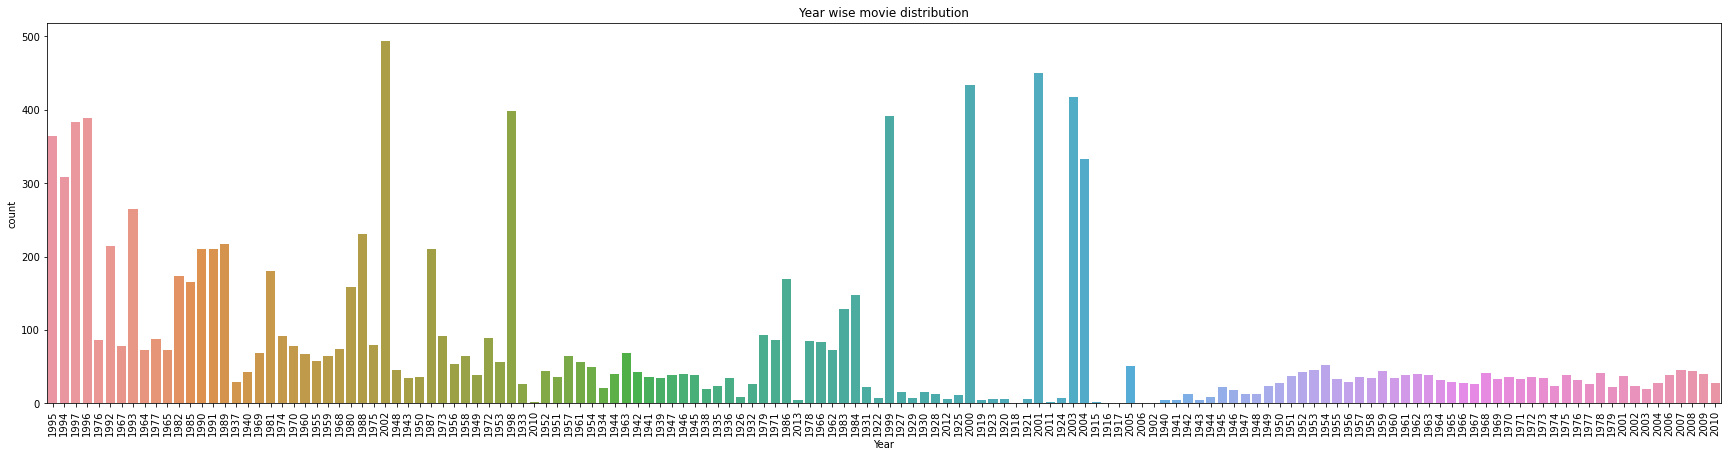

In [ ]:
plt.figure(figsize=(30,7))
plt.title('Year wise movie distribution')
sns.countplot(data_full['Year'])
plt.xticks(rotation=90)
plt.show()

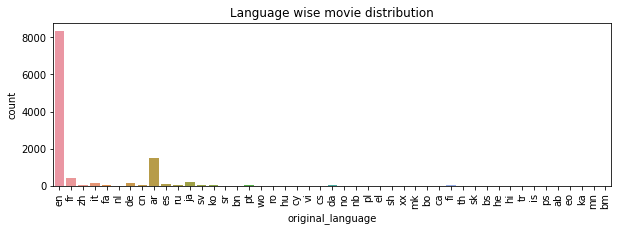

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Language wise movie distribution')
sns.countplot(data_full['original_language'])
plt.xticks(rotation=90)
plt.show()

# filter data so that it contains movie in english and arabic only

In [ ]:
data_full = data_full[data_full['original_language'].isin(['en','ar'])]

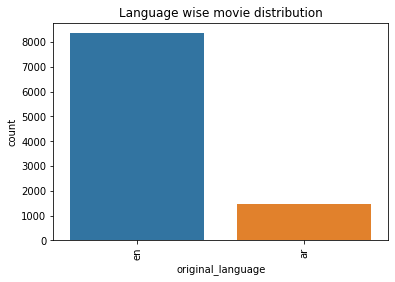

In [ ]:
# plt.figure(figsize=(5))
plt.title('Language wise movie distribution')
sns.countplot(data_full['original_language'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
category = []
from tqdm.notebook import tqdm
for cat in tqdm(data_full[data_full['original_language'].isin(['en'])]['genres']):
    category = category + cat

  0%|          | 0/8357 [00:00<?, ?it/s]

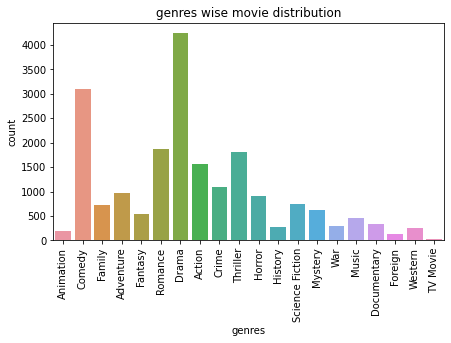

In [ ]:
# Engligh movies
plt.figure(figsize=(7,4))
plt.title('genres wise movie distribution')
sns.countplot(category)
plt.xticks(rotation=90)
plt.xlabel('genres')
plt.show()

In [ ]:
category = []
for cat in tqdm(data_full[data_full['original_language'].isin(['ar'])]['genres']):
    category = category + cat
    
category = [i for i in category if len(i)<=40]

  0%|          | 0/1476 [00:00<?, ?it/s]

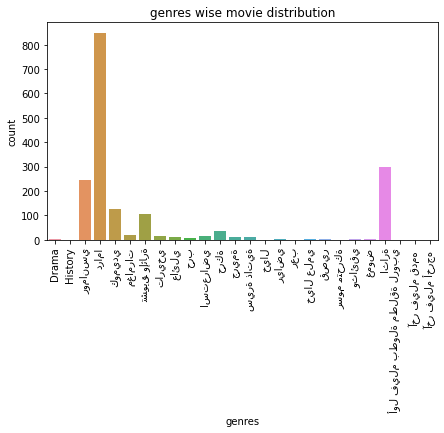

In [ ]:
# arabic movies
plt.figure(figsize=(7,4))
plt.title('genres wise movie distribution')
sns.countplot(category)
plt.xticks(rotation=90)
plt.xlabel('genres')
plt.show()

In [ ]:
# Engligh movies
category = []
from tqdm.notebook import tqdm
for cat in tqdm(data_full[data_full['original_language'].isin(['en'])]['cast']):
    category = category + cat

  0%|          | 0/8357 [00:00<?, ?it/s]

In [ ]:
d = dict(sorted(Counter(category).items(),key=lambda x:x[1],reverse=True)[:50])

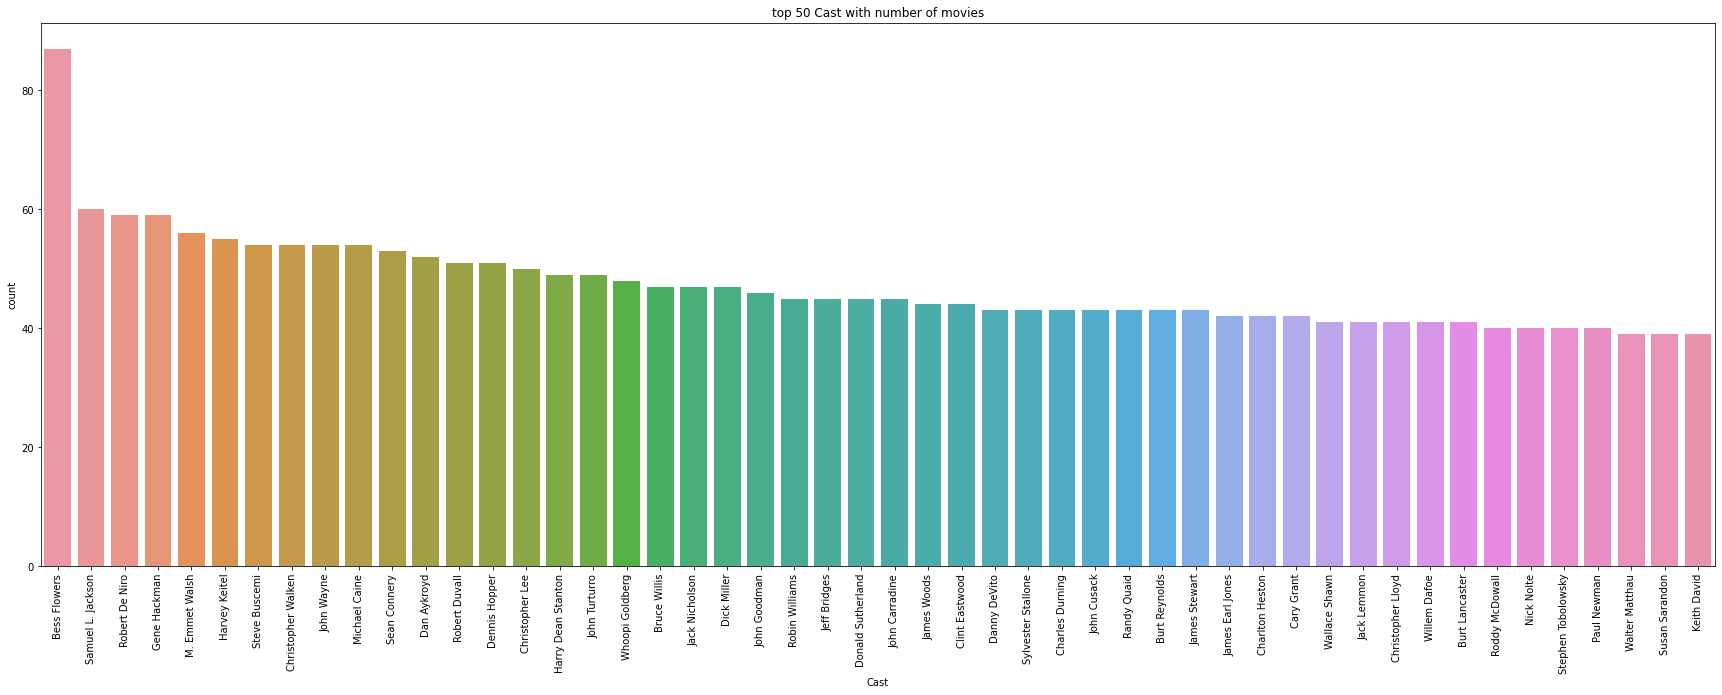

In [ ]:
all_cast = []
for i in d:
    all_cast = all_cast + [i]*d[i]
    
plt.figure(figsize=(30,10))
plt.title('top 50 Cast with number of movies')
sns.countplot(all_cast)
plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.show()

  0%|          | 0/1476 [00:00<?, ?it/s]

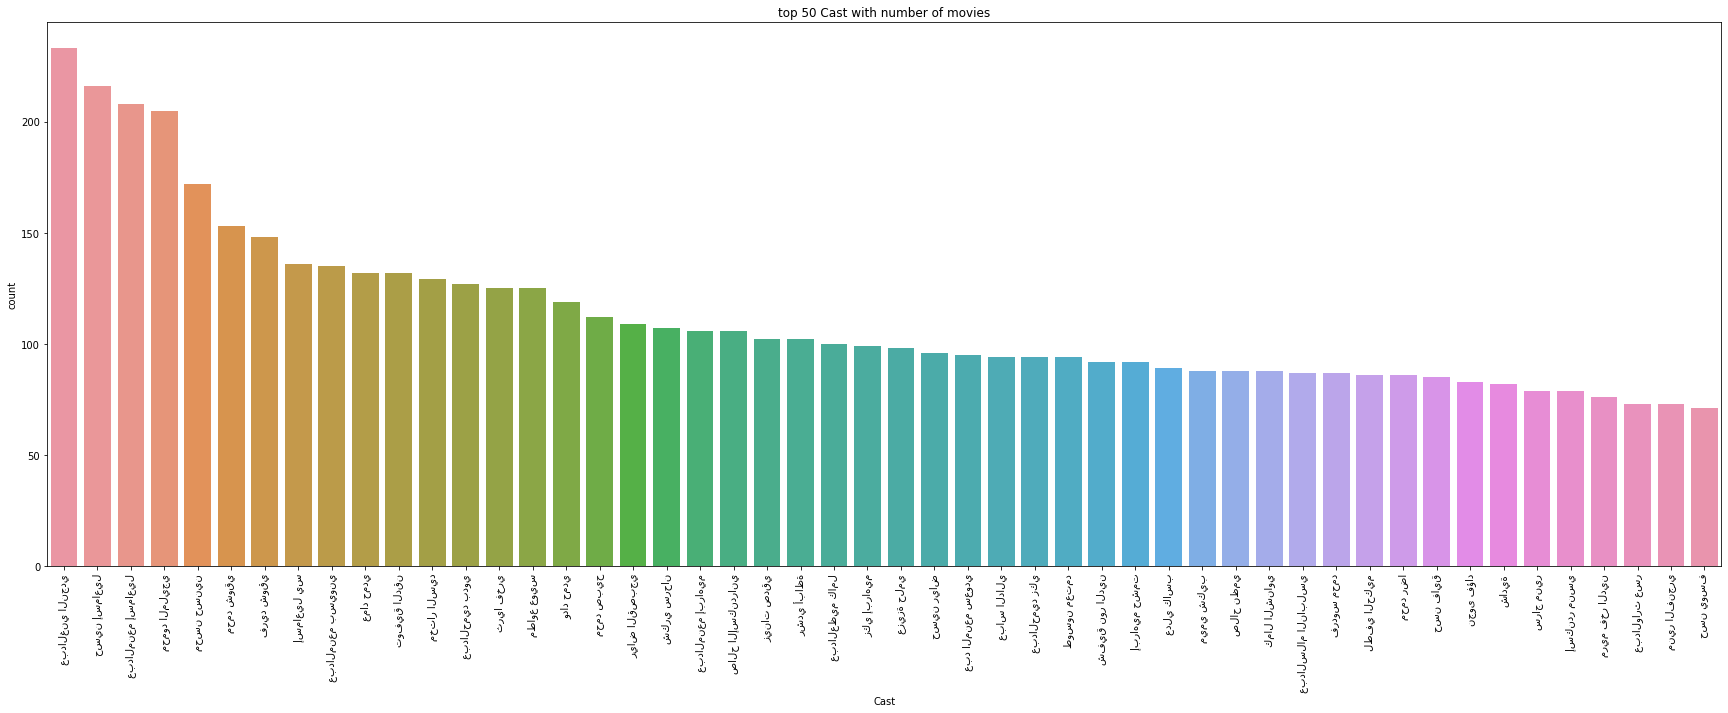

In [ ]:
# arabic movies
category = []
from tqdm.notebook import tqdm
for cat in tqdm(data_full[data_full['original_language'].isin(['ar'])]['cast']):
    category = category + cat
    
d = dict(sorted(Counter(category).items(),key=lambda x:x[1],reverse=True)[:50])
all_cast = []
for i in d:
    all_cast = all_cast + [i]*d[i]
    
plt.figure(figsize=(30,10))
plt.title('top 50 Cast with number of movies')
sns.countplot(all_cast)
plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.show()

In [ ]:
!pip install pyarabic

In [ ]:
import string 
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

    # Arabic stop words with nltk
stop_words= pd.read_csv('/Users/newuser/Desktop/Practucum2/final_Movies_data0.csv')
stop_words=stop_words.get('stop words')

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    #remove numbers
    text = re.sub("[0123456789]", '', text)

    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    
    #remove elongation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [ ]:
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    return(text)

In [ ]:
# Arabic stop words with nltk
stop_words = stopwords.words('arabic')
stop_words_ae = [normalizeArabic(word) for word in stop_words]

# Intial Recommendation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def make_recommendation(metadata=data_full):

    #grabbing the new wordsoup from the user
    searchTerms = get_searchTerms()  
#     print(searchTerms)
    ################# filter dataframe for recommendation #################
    
    if searchTerms[2]:
        metadata_copy = metadata[metadata['original_language']==searchTerms[2].lower()]

    if searchTerms[0]:
        
        f_data = metadata_copy[metadata_copy['genres'].apply(lambda x: any(t.strip().title() in x for t in searchTerms[0].split(',')))]
#         f_data = metadata_copy[metadata_copy['genres'].apply(lambda x: searchTerms[0] in x)]
        if len(f_data):
            metadata_copy = f_data
            
    if searchTerms[1]:
        
        f = lambda x: any(t.strip().title() in ' '.join(x).split() for t in searchTerms[1].split(','))
        
        f_data = metadata_copy[metadata_copy['cast'].apply(f)]
        

#         f_data = metadata_copy[metadata_copy['cast'].apply(lambda x: searchTerms[1] in ' '.join(x).split())]
        if len(f_data):
            metadata_copy = f_data
    #######################################################################
    
    #Vectorizing the entire matrix as described above!
    
    if searchTerms[2].lower() == 'en':
        count = CountVectorizer(stop_words='english')
    else:
        count = CountVectorizer(stop_words=stop_words_ae)
        
    count_matrix = count.fit_transform(metadata_copy['soup'])

    #running pairwise cosine similarity 
    cosine_sim2 = cosine_similarity(count_matrix, count_matrix) #getting a similarity matrix

    #sorting cosine similarities by highest to lowest
    sim_scores = list(enumerate(cosine_sim2[-1,:]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     print(sim_scores)
    #matching the simix
    # similarities to the movie titles and ids
    ranked_titles = []
    for i in range(1, 11):
        try:
            indx = sim_scores[i][0]
            ranked_titles.append([metadata_copy['title'].iloc[indx]])
        except:
            pass
    ranked_titles = pd.DataFrame(np.array(ranked_titles)[:,0],columns=['Title'])
    return ranked_titles

In [ ]:
#let's try our recommendation function now
print(make_recommendation())

What Movie Genre are you interested in (ماهو نوع الفيلم الذي تريد مشاهدته؟)? [Type 'skip' to skip this question] اثارة
Who are some actors within the genre that you love (اهو نوع الفيلم؟)? [Type 'skip' to skip this question] 
What is the spoken language (type 'en' for English and 'ar' for Arabic [نملك افلام في لغتين] en
                                   Title
0                           Mean Machine
1  Vacuuming Completely Nude in Paradise
2                                  Naked
3                       Princess Caraboo
4                         My Name Is Joe
5                      Salt of the Earth
6                                   Liam
7                           Just Married
8                                 Iceman
9                              G.I. Jane


In [ ]:
print(make_recommendation())

In [ ]:
print(make_recommendation())

What Movie Genre are you interested in (ماهو نوع الفيلم الذي تريد مشاهدته؟)? [Type 'skip' to skip this question] romance 
Who are some actors within the genre that you love (اهو نوع الفيلم؟)? [Type 'skip' to skip this question] John Finn
What is the spoken language (type 'en' for English and 'ar' for Arabic [نملك افلام في لغتين] en
                      Title
0            Young at Heart
1                  The Rose
2              Book of Love
3        Frankie and Johnny
4                 The Boost
5                    Always
6     The Enchanted Cottage
7        The Luzhin Defence
8               San Antonio
9  The Young Philadelphians


# Summary:
•English Movies Data: Removed brackets, quotes, and duplicate title entries completely. Lowercased the names and also the columns.  
•Arabic Movies Data: Using ANLP applied Normalization and Tokenization


NLP Tools 
Used a ML approach to vectorize the words by using two models Counter-Vectorizer and TF-IDF
After Vectorizing the words, the Cosine similarity was applied.  
Using Sklearn Library 


### In our Initial Recommendation System we were Using The CounterVectorizer and Genre & Actors are only the Keywords and as shown above, the results weren't good and accurate. **Go to the file app.py where I adjusted the recommender system by doing the below: 
### Used TF-IDF because it balances out the word frequency by the times they appears on the corpus. So, the same input vector when compared with the genre using cosine similarity will be balanced out properly throwing relevant results in combination with the title and the cast.
### Build the soup with only Cast, Genre and Language
### Removed the Years for the search terms or as a keyword and kept the above keywords instead. 
# Why the years? We opted out the years because this will bias the TF-IDF verctorizer as years are categorical and less in number in compariosin to the other words of the corpus. For instance, not all the English movies have the year with them and also for some of the Arabic while the indian ones have year for each movie (no empty rows in year column)

## Building the Chatbot: 
Used PythonAnywhere Platform to host our code in the cloud. 
Used Spyder to get it out. 
Used Flask API to build a web app. 




# Conclusion: 
In this project, the TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 
There are loads of scopes for further improvement on this use case, especially in designing a collaborative Filtering recommendation system. 
It is very noticeable that the percentage of Arabic and Telgue Movies are less than the English one. 
In future work, adding more and accurate data will greatly improve the project. This means we would need more Memory and RAM space. 


#### Sources: 
aboalzeez yussefaboalzeez yussef 133 bronze badges, A., & sophrossophros 12.8k88 gold badges4242 silver badges6565 bronze badges. (2008, December 1). Fake news detection using pickle. Stack Overflow. Retrieved October 14, 2022, from https://stackoverflow.com/questions/68804368/fake-news-detection-using-pickle 
Admin, A. (2021, May 18). Web-based chatbot using FLASK API. Buff ML. Retrieved December 5, 2022, from https://buffml.com/web-based-chatbot-using-flask-api/ 
Saket, S. (2021, June 23). Count Vectorizer vs TFIDF vectorizer: Natural language processing. LinkedIn. Retrieved December 5, 2022, from https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket  
Simha, A. (2021). Understanding TF-IDF for Machine Learning. Capital One. Retrieved December 5, 2022, from https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/ 


Thank you! 


